In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
trainHouseCSV = files.upload()

trainHouse = pd.read_csv('train.csv')
trainHouse.head()

Saving train.csv to train (11).csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from google.colab import files
testHouseCSV = files.upload()

testHouse = pd.read_csv('test.csv')
testHouse.head()

Saving test.csv to test (4).csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<Axes: xlabel='SalePrice', ylabel='Count'>

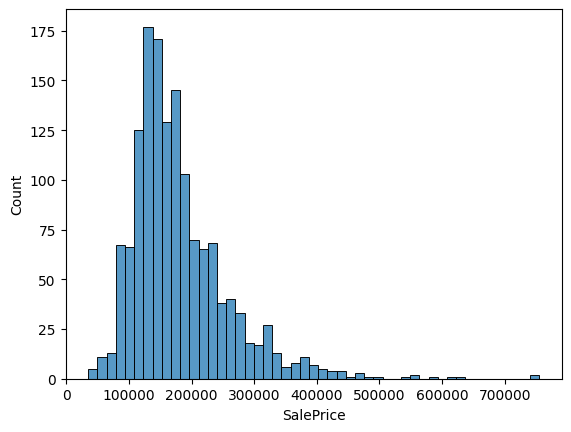

In [ ]:
sns.histplot(trainHouse['SalePrice'])

In [ ]:
X = trainHouse.drop('SalePrice', axis=1)
y = trainHouse['SalePrice']

In [ ]:
# columns with high proportion NaN value
nan_percentage = X.isnull().sum() / len(trainHouse) * 100
cols_with_high_nan = nan_percentage[nan_percentage > 50].index.tolist()
print("Columns with more than 50% missing values:")
print(cols_with_high_nan)

Columns with more than 50% missing values:
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
X.drop(['MasVnrType', 'Fence', 'PoolQC', 'MiscFeature', 'FireplaceQu', 'Id'],axis=1,inplace=True)

In [ ]:
testHouse.drop(['MasVnrType', 'Fence', 'PoolQC', 'MiscFeature', 'FireplaceQu', 'Id'],axis=1,inplace=True)

In [ ]:
categorical_cols = X.select_dtypes(include='object')
print("Categorical columns in X and their number of unique values:")
for col in categorical_cols.columns:
    print(f"- {col}: {categorical_cols[col].nunique()} unique values")

Categorical columns in X and their number of unique values:
- MSZoning: 5 unique values
- Street: 2 unique values
- Alley: 2 unique values
- LotShape: 4 unique values
- LandContour: 4 unique values
- Utilities: 2 unique values
- LotConfig: 5 unique values
- LandSlope: 3 unique values
- Neighborhood: 25 unique values
- Condition1: 9 unique values
- Condition2: 8 unique values
- BldgType: 5 unique values
- HouseStyle: 8 unique values
- RoofStyle: 6 unique values
- RoofMatl: 8 unique values
- Exterior1st: 15 unique values
- Exterior2nd: 16 unique values
- ExterQual: 4 unique values
- ExterCond: 5 unique values
- Foundation: 6 unique values
- BsmtQual: 4 unique values
- BsmtCond: 4 unique values
- BsmtExposure: 4 unique values
- BsmtFinType1: 6 unique values
- BsmtFinType2: 6 unique values
- Heating: 6 unique values
- HeatingQC: 5 unique values
- CentralAir: 2 unique values
- Electrical: 5 unique values
- KitchenQual: 4 unique values
- Functional: 7 unique values
- GarageType: 6 unique val

In [ ]:
missing_values_after_imputation = X.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

print("Columns in X with remaining missing values and their unique value count:")
for col in missing_values_after_imputation.index:
    print(f"- {col}: {missing_values_after_imputation[col]} missing values, {X[col].nunique()} unique values")

Columns in X with remaining missing values and their unique value count:
- LotFrontage: 259 missing values, 110 unique values
- Alley: 1369 missing values, 2 unique values
- MasVnrArea: 8 missing values, 327 unique values
- BsmtQual: 37 missing values, 4 unique values
- BsmtCond: 37 missing values, 4 unique values
- BsmtExposure: 38 missing values, 4 unique values
- BsmtFinType1: 37 missing values, 6 unique values
- BsmtFinType2: 38 missing values, 6 unique values
- Electrical: 1 missing values, 5 unique values
- GarageType: 81 missing values, 6 unique values
- GarageYrBlt: 81 missing values, 97 unique values
- GarageFinish: 81 missing values, 3 unique values
- GarageQual: 81 missing values, 5 unique values
- GarageCond: 81 missing values, 5 unique values


In [ ]:
# get dummies: Utilities, Street, Alley, CentralAir, ExterQual, HeatingQC, PavedDrive, KitchenQual, FireplaceQu, PoolQC
# OrdinalEncoder: MSZoning, BsmtQual, LotShape, GarageQual, GarageCond, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterCond, Foundation, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, Electrical, Functional, GarageType, GarageFinish, Fence, MiscFeature, SaleType, SaleCondition

In [ ]:
# get_dummies
oneHot_cols = ['Utilities', 'Street', 'Alley', 'CentralAir', 'ExterQual', 'HeatingQC', 'PavedDrive', 'KitchenQual']
X = pd.get_dummies(X, columns=oneHot_cols)

In [ ]:
testHouse = pd.get_dummies(testHouse, columns=oneHot_cols)

In [ ]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,False,False,False,False,False,True,False,False,True,False
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,False,False,False,False,False,True,False,False,False,True
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,False,False,False,False,False,True,False,False,True,False
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,True,False,False,False,False,True,False,False,True,False
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
X.drop(['Utilities_NoSeWa'], axis=1, inplace=True)

In [ ]:
# OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['MSZoning', 'BsmtQual', 'LotShape', 'GarageQual', 'GarageCond', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']
encoder = OrdinalEncoder()
X[ordinal_cols] = encoder.fit_transform(X[ordinal_cols])

In [ ]:
testHouse[ordinal_cols] = encoder.fit_transform(testHouse[ordinal_cols])

In [ ]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,60,3.0,65.0,8450,3.0,3.0,4.0,0.0,5.0,2.0,...,False,False,False,False,False,True,False,False,True,False
1,20,3.0,80.0,9600,3.0,3.0,2.0,0.0,24.0,1.0,...,False,False,False,False,False,True,False,False,False,True
2,60,3.0,68.0,11250,0.0,3.0,4.0,0.0,5.0,2.0,...,False,False,False,False,False,True,False,False,True,False
3,70,3.0,60.0,9550,0.0,3.0,0.0,0.0,6.0,2.0,...,True,False,False,False,False,True,False,False,True,False
4,60,3.0,84.0,14260,0.0,3.0,2.0,0.0,15.0,2.0,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
testHouse.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,20,2.0,80.0,11622,3.0,3.0,4.0,0.0,12.0,1.0,...,False,False,True,False,False,True,False,False,False,True
1,20,3.0,81.0,14267,0.0,3.0,0.0,0.0,12.0,2.0,...,False,False,True,False,False,True,False,False,True,False
2,60,3.0,74.0,13830,0.0,3.0,4.0,0.0,8.0,2.0,...,True,False,False,False,False,True,False,False,False,True
3,60,3.0,78.0,9978,0.0,3.0,4.0,0.0,8.0,2.0,...,False,False,False,False,False,True,False,False,True,False
4,120,3.0,43.0,5005,0.0,1.0,4.0,0.0,22.0,2.0,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# categorical_cols = X.select_dtypes(include="object").columns
# encoder = OrdinalEncoder()
# X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

<Axes: >

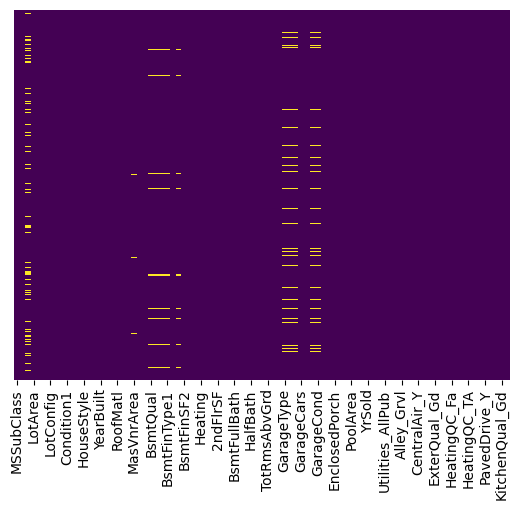

In [ ]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
missing_values = X.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns in X with missing values (sorted):")
print(missing_values)

Columns in X with missing values (sorted):
LotFrontage     259
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageType       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
MasVnrArea        8
Electrical        1
dtype: int64


In [ ]:
# IMPUTE

In [ ]:
# LotFrontage

correlation_matrix = X.corr()
correlation_with_LotFrontage = correlation_matrix['LotFrontage'].drop('LotFrontage')
most_correlated_column_LotFrontage = correlation_with_LotFrontage.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to LotFrontage that has no nulls is: {most_correlated_column_LotFrontage}")

def impute_LotFrontage(df):
    df['LotFrontage'] = df.groupby(most_correlated_column_LotFrontage)['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
    return df

X = impute_LotFrontage(X)
print("\nMissing values in LotFrontage after imputation:")
print(X['LotFrontage'].isnull().sum())

The column with the highest correlation to LotFrontage that has no nulls is: 1stFlrSF

Missing values in LotFrontage after imputation:
80


In [ ]:
testHouse = impute_LotFrontage(testHouse)

In [ ]:
most_correlated_column_LotFrontage = correlation_with_LotFrontage.abs().sort_values(ascending=False).index[1]

print(f"The column with the highest correlation to LotFrontage that has no nulls is: {most_correlated_column_LotFrontage}")

def impute_LotFrontage(df):
    df['LotFrontage'] = df.groupby(most_correlated_column_LotFrontage)['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
    return df

X = impute_LotFrontage(X)
print("\nMissing values in LotFrontage after imputation:")
print(X['LotFrontage'].isnull().sum())

The column with the highest correlation to LotFrontage that has no nulls is: BldgType

Missing values in LotFrontage after imputation:
0


In [ ]:
testHouse = impute_LotFrontage(testHouse)

In [ ]:
# GarageYrBlt

In [ ]:
correlation_matrix = X.corr()
correlation_with_GarageYrBlt = correlation_matrix['GarageYrBlt'].drop('GarageYrBlt')
most_correlated_column_GarageYrBlt = correlation_with_GarageYrBlt.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to GarageYrBlt that has no nulls is: {most_correlated_column_GarageYrBlt}")

def impute_GarageYrBlt(df):
    df['GarageYrBlt'] = df.groupby(most_correlated_column_GarageYrBlt)['GarageYrBlt'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_GarageYrBlt(X)
print("\nMissing values in GarageYrBlt after imputation:")
print(X['GarageYrBlt'].isnull().sum())

The column with the highest correlation to GarageYrBlt that has no nulls is: YearBuilt

Missing values in GarageYrBlt after imputation:
3


In [ ]:
testHouse = impute_GarageYrBlt(testHouse)

In [ ]:
mode_GarageYrBlt = X['GarageYrBlt'].mode()[0]
X['GarageYrBlt'] = X['GarageYrBlt'].fillna(mode_GarageYrBlt)

In [ ]:
mode_GarageYrBlt = testHouse['GarageYrBlt'].mode()[0]
testHouse['GarageYrBlt'] = testHouse['GarageYrBlt'].fillna(mode_GarageYrBlt)

In [ ]:
# GarageFinish
correlation_matrix = X.corr()
correlation_with_GarageFinish = correlation_matrix['GarageFinish'].drop('GarageFinish')
most_correlated_column_GarageFinish = correlation_with_GarageFinish.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to GarageFinish that has no nulls is: {most_correlated_column_GarageFinish}")

def impute_GarageFinish(df):
    df['GarageFinish'] = df.groupby(most_correlated_column_GarageFinish)['GarageFinish'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_GarageFinish(X)
print("\nMissing values in GarageFinish after imputation:")
print(X['GarageFinish'].isnull().sum())

The column with the highest correlation to GarageFinish that has no nulls is: YearBuilt

Missing values in GarageFinish after imputation:
3


In [ ]:
testHouse = impute_GarageFinish(testHouse)

In [ ]:
mode_GarageFinish = X['GarageFinish'].mode()[0]
X['GarageFinish'] = X['GarageFinish'].fillna(mode_GarageFinish)

In [ ]:
mode_GarageFinish = testHouse['GarageFinish'].mode()[0]
testHouse['GarageFinish'] = testHouse['GarageFinish'].fillna(mode_GarageFinish)

In [ ]:
# GarageCond

In [ ]:
correlation_matrix = X.corr()
correlation_with_GarageCond = correlation_matrix['GarageCond'].drop('GarageCond')
most_correlated_column_GarageCond = correlation_with_GarageCond.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to GarageCond that has no nulls is: {most_correlated_column_GarageCond}")

def impute_GarageCond(df):
    df['GarageCond'] = df.groupby(most_correlated_column_GarageCond)['GarageCond'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_GarageCond(X)
print("\nMissing values in GarageCond after imputation:")
print(X['GarageCond'].isnull().sum())

The column with the highest correlation to GarageCond that has no nulls is: GarageQual

Missing values in GarageCond after imputation:
81


In [ ]:
testHouse = impute_GarageCond(testHouse)

In [ ]:
most_correlated_column_GarageCond = correlation_with_GarageCond.abs().sort_values(ascending=False).index[1]

print(f"The column with the highest correlation to GarageCond that has no nulls is: {most_correlated_column_GarageCond}")

def impute_GarageCond(df):
    df['GarageCond'] = df.groupby(most_correlated_column_GarageCond)['GarageCond'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_GarageCond(X)
print("\nMissing values in GarageCond after imputation:")
print(X['GarageCond'].isnull().sum())

The column with the highest correlation to GarageCond that has no nulls is: YearBuilt

Missing values in GarageCond after imputation:
3


In [ ]:
testHouse = impute_GarageCond(testHouse)

In [ ]:
mode_GarageCond = X['GarageCond'].mode()[0]
X['GarageCond'] = X['GarageCond'].fillna(mode_GarageCond)

In [ ]:
mode_GarageCond = testHouse['GarageCond'].mode()[0]
testHouse['GarageCond'] = testHouse['GarageCond'].fillna(mode_GarageCond)

In [ ]:
# GarageQual
correlation_matrix = X.corr()
correlation_with_GarageQual = correlation_matrix['GarageQual'].drop('GarageQual')
most_correlated_column_GarageQual = correlation_with_GarageQual.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to GarageQual that has no nulls is: {most_correlated_column_GarageQual}")

def impute_GarageQual(df):
    df['GarageQual'] = df.groupby(most_correlated_column_GarageQual)['GarageQual'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_GarageQual(X)
print("\nMissing values in GarageQual after imputation:")
print(X['GarageQual'].isnull().sum())

The column with the highest correlation to GarageQual that has no nulls is: GarageCond

Missing values in GarageQual after imputation:
0


In [ ]:
testHouse = impute_GarageQual(testHouse)

In [ ]:
# GarageType
correlation_matrix = X.corr()
correlation_with_GarageType = correlation_matrix['GarageType'].drop('GarageType')
most_correlated_column_GarageType = correlation_with_GarageType.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to GarageType that has no nulls is: {most_correlated_column_GarageType}")

def impute_GarageType(df):
    df['GarageType'] = df.groupby(most_correlated_column_GarageType)['GarageType'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_GarageType(X)
print("\nMissing values in GarageType after imputation:")
print(X['GarageType'].isnull().sum())

The column with the highest correlation to GarageType that has no nulls is: YearBuilt

Missing values in GarageType after imputation:
3


In [ ]:
testHouse = impute_GarageType(testHouse)

In [ ]:
mode_GarageType = X['GarageType'].mode()[0]
X['GarageType'] = X['GarageType'].fillna(mode_GarageType)

In [ ]:
mode_GarageType = testHouse['GarageType'].mode()[0]
testHouse['GarageType'] = testHouse['GarageType'].fillna(mode_GarageType)

In [ ]:
# Electrical
mode_Electrical = X['Electrical'].mode()[0]
X['Electrical'] = X['Electrical'].fillna(mode_Electrical)

In [ ]:
# Electrical
mode_Electrical = testHouse['Electrical'].mode()[0]
testHouse['Electrical'] = testHouse['Electrical'].fillna(mode_Electrical)

In [ ]:
# BsmtFinType2
correlation_matrix = X.corr()
correlation_with_BsmtFinType2 = correlation_matrix['BsmtFinType2'].drop('BsmtFinType2')
most_correlated_column_BsmtFinType2 = correlation_with_BsmtFinType2.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to BsmtFinType2 that has no nulls is: {most_correlated_column_BsmtFinType2}")

def impute_BsmtFinType2(df):
    df['BsmtFinType2'] = df.groupby(most_correlated_column_BsmtFinType2)['BsmtFinType2'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_BsmtFinType2(X)
print("\nMissing values in BsmtFinType2 after imputation:")
print(X['BsmtFinType2'].isnull().sum())

The column with the highest correlation to BsmtFinType2 that has no nulls is: BsmtFinSF2

Missing values in BsmtFinType2 after imputation:
1


In [ ]:
testHouse = impute_BsmtFinType2(testHouse)

In [ ]:
mode_BsmtFinType2 = X['BsmtFinType2'].mode()[0]
X['BsmtFinType2'] = X['BsmtFinType2'].fillna(mode_BsmtFinType2)

In [ ]:
mode_BsmtFinType2 = testHouse['BsmtFinType2'].mode()[0]
testHouse['BsmtFinType2'] = testHouse['BsmtFinType2'].fillna(mode_BsmtFinType2)

In [ ]:
# BsmtFinType1
correlation_matrix = X.corr()
correlation_with_BsmtFinType1 = correlation_matrix['BsmtFinType1'].drop('BsmtFinType1')
most_correlated_column_BsmtFinType1 = correlation_with_BsmtFinType1.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to BsmtFinType1 that has no nulls is: {most_correlated_column_BsmtFinType1}")

def impute_BsmtFinType1(df):
    df['BsmtFinType1'] = df.groupby(most_correlated_column_BsmtFinType1)['BsmtFinType1'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_BsmtFinType1(X)
print("\nMissing values in BsmtFinType1 after imputation:")
print(X['BsmtFinType1'].isnull().sum())

The column with the highest correlation to BsmtFinType1 that has no nulls is: BsmtFinSF1

Missing values in BsmtFinType1 after imputation:
0


In [ ]:
testHouse = impute_BsmtFinType1(testHouse)

In [ ]:
# BsmtExposure
correlation_matrix = X.corr()
correlation_with_BsmtExposure = correlation_matrix['BsmtExposure'].drop('BsmtExposure')
most_correlated_column_BsmtExposure = correlation_with_BsmtExposure.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to BsmtExposure that has no nulls is: {most_correlated_column_BsmtExposure}")

def impute_BsmtExposure(df):
    df['BsmtExposure'] = df.groupby(most_correlated_column_BsmtExposure)['BsmtExposure'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_BsmtExposure(X)
print("\nMissing values in BsmtExposure after imputation:")
print(X['BsmtExposure'].isnull().sum())

The column with the highest correlation to BsmtExposure that has no nulls is: YearBuilt

Missing values in BsmtExposure after imputation:
0


In [ ]:
testHouse = impute_BsmtExposure(testHouse)

In [ ]:
# BsmtCond

In [ ]:
correlation_matrix = X.corr()
correlation_with_BsmtCond = correlation_matrix['BsmtCond'].drop('BsmtCond')
most_correlated_column_BsmtCond = correlation_with_BsmtCond.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to BsmtCond that has no nulls is: {most_correlated_column_BsmtCond}")

def impute_BsmtCond(df):
    df['BsmtCond'] = df.groupby(most_correlated_column_BsmtCond)['BsmtCond'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_BsmtCond(X)
print("\nMissing values in BsmtCond after imputation:")
print(X['BsmtCond'].isnull().sum())

The column with the highest correlation to BsmtCond that has no nulls is: ExterCond

Missing values in BsmtCond after imputation:
0


In [ ]:
testHouse = impute_BsmtCond(testHouse)

In [ ]:
# BsmtQual
correlation_matrix = X.corr()
correlation_with_BsmtQual = correlation_matrix['BsmtQual'].drop('BsmtQual')
most_correlated_column_BsmtQual = correlation_with_BsmtQual.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to BsmtQual that has no nulls is: {most_correlated_column_BsmtQual}")

def impute_BsmtQual(df):
    df['BsmtQual'] = df.groupby(most_correlated_column_BsmtQual)['BsmtQual'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

X = impute_BsmtQual(X)
print("\nMissing values in BsmtQual after imputation:")
print(X['BsmtQual'].isnull().sum())

The column with the highest correlation to BsmtQual that has no nulls is: OverallQual

Missing values in BsmtQual after imputation:
0


In [ ]:
testHouse = impute_BsmtQual(testHouse)

In [ ]:
# MasVnrArea
correlation_matrix = X.corr()
correlation_with_MasVnrArea = correlation_matrix['MasVnrArea'].drop('MasVnrArea')
most_correlated_column_MasVnrArea = correlation_with_MasVnrArea.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to MasVnrArea that has no nulls is: {most_correlated_column_MasVnrArea}")

def impute_MasVnrArea(df):
    df['MasVnrArea'] = df.groupby(most_correlated_column_MasVnrArea)['MasVnrArea'].transform(lambda x: x.fillna(x.mean()))
    return df

X = impute_MasVnrArea(X)
print("\nMissing values in MasVnrArea after imputation:")
print(X['MasVnrArea'].isnull().sum())

The column with the highest correlation to MasVnrArea that has no nulls is: OverallQual

Missing values in MasVnrArea after imputation:
0


In [ ]:
testHouse = impute_MasVnrArea(testHouse)

<Axes: >

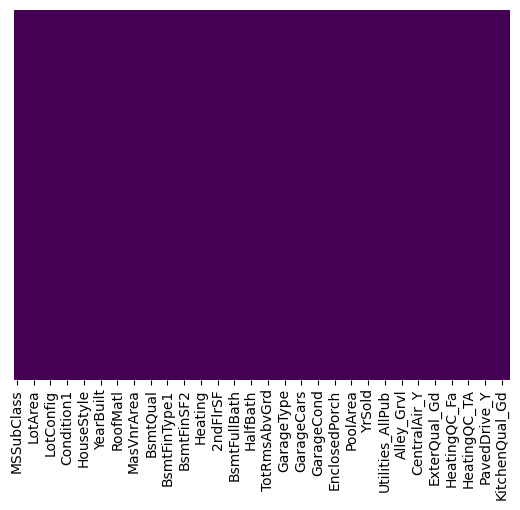

In [ ]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Feature engineering

# 1. Gabungkan Fitur Kualitas dan Kondisi
X['OverallQual_Cond'] = X['OverallQual'] * X['OverallCond']
testHouse['OverallQual_Cond'] = testHouse['OverallQual'] * testHouse['OverallCond']

# 2. Hitung Usia Rumah
X['House_Age'] = X['YrSold'] - X['YearBuilt']
X['Years_Since_Remodel'] = X['YrSold'] - X['YearRemodAdd']
testHouse['House_Age'] = testHouse['YrSold'] - testHouse['YearBuilt']
testHouse['Years_Since_Remodel'] = testHouse['YrSold'] - testHouse['YearRemodAdd']

X['Years_Since_Remodel'] = X.apply(lambda row: row['House_Age'] if row['Years_Since_Remodel'] < 0 else row['Years_Since_Remodel'], axis=1)
testHouse['Years_Since_Remodel'] = testHouse.apply(lambda row: row['House_Age'] if row['Years_Since_Remodel'] < 0 else row['Years_Since_Remodel'], axis=1)

# 3. Interaksi Luas Area
X['TotalSF'] = X['1stFlrSF'] + X['2ndFlrSF']
testHouse['TotalSF'] = testHouse['1stFlrSF'] + testHouse['2ndFlrSF']

In [ ]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive_P,PavedDrive_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,OverallQual_Cond,House_Age,Years_Since_Remodel,TotalSF
0,60,3.0,65.0,8450,3.0,3.0,4.0,0.0,5.0,2.0,...,False,True,False,False,True,False,35,5,5,1710
1,20,3.0,80.0,9600,3.0,3.0,2.0,0.0,24.0,1.0,...,False,True,False,False,False,True,48,31,31,1262
2,60,3.0,68.0,11250,0.0,3.0,4.0,0.0,5.0,2.0,...,False,True,False,False,True,False,35,7,6,1786
3,70,3.0,60.0,9550,0.0,3.0,0.0,0.0,6.0,2.0,...,False,True,False,False,True,False,35,91,36,1717
4,60,3.0,84.0,14260,0.0,3.0,2.0,0.0,15.0,2.0,...,False,True,False,False,True,False,40,8,8,2198


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of the scaled DataFrame X:")
display(X_scaled.head())

First 5 rows of the scaled DataFrame X:


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive_P,PavedDrive_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,OverallQual_Cond,House_Age,Years_Since_Remodel,TotalSF
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,0.208333,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.382022,0.036765,0.083333,0.259231
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.5,0.0,1.000000,0.125,...,0.0,1.0,0.0,0.0,0.0,1.0,0.528090,0.227941,0.516667,0.174830
2,0.235294,0.75,0.160959,0.046507,0.0,1.0,1.0,0.0,0.208333,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.382022,0.051471,0.100000,0.273549
3,0.294118,0.75,0.133562,0.038561,0.0,1.0,0.0,0.0,0.250000,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.382022,0.669118,0.600000,0.260550
4,0.235294,0.75,0.215753,0.060576,0.0,1.0,0.5,0.0,0.625000,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.438202,0.058824,0.133333,0.351168


In [ ]:
testHouse_scaled = scaler.transform(testHouse)
testHouse_scaled = pd.DataFrame(testHouse_scaled, columns=testHouse.columns)

print("First 5 rows of the scaled DataFrame X:")
display(testHouse_scaled.head())

First 5 rows of the scaled DataFrame X:


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive_P,PavedDrive_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,OverallQual_Cond,House_Age,Years_Since_Remodel,TotalSF
0,0.000000,0.50,0.202055,0.048246,1.0,1.000000,1.0,0.0,0.500000,0.125,...,0.0,1.0,0.0,0.0,0.0,1.0,0.325843,0.360294,0.816667,0.105878
1,0.000000,0.75,0.205479,0.060609,0.0,1.000000,0.0,0.0,0.500000,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.393258,0.382353,0.866667,0.187453
2,0.235294,0.75,0.181507,0.058566,0.0,1.000000,1.0,0.0,0.333333,0.250,...,0.0,1.0,0.0,0.0,0.0,1.0,0.269663,0.095588,0.200000,0.243971
3,0.235294,0.75,0.195205,0.040562,0.0,1.000000,1.0,0.0,0.333333,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.393258,0.088235,0.200000,0.239261
4,0.588235,0.75,0.075342,0.017318,0.0,0.333333,1.0,0.0,0.916667,0.250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.438202,0.132353,0.300000,0.178222


In [ ]:
# Display columns in X_scaled that are not in testHouse_scaled
missing_cols_in_test = set(X_scaled.columns) - set(testHouse_scaled.columns)
print("Columns in X_scaled not found in testHouse_scaled:")
print(missing_cols_in_test)

Columns in X_scaled not found in testHouse_scaled:
set()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

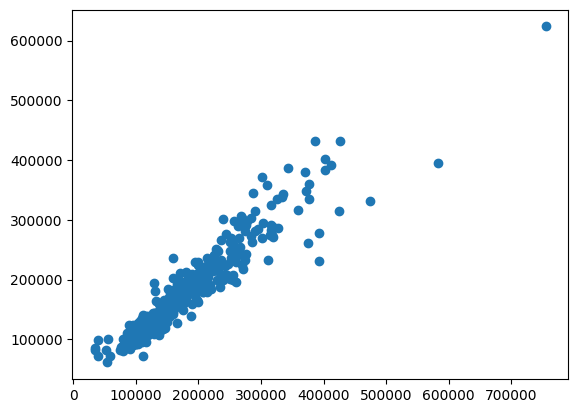

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=101)
xgb_model.fit(X_train, y_train)

predictions_xgb = xgb_model.predict(X_test)

plt.scatter(y_test,predictions_xgb)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions_xgb)
rmse = np.sqrt(mean_squared_error(y_test, predictions_xgb))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 16730.654296875
Root Mean Squared Error (RMSE): 26801.17370564207


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000, 1100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=101),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best negative MSE found: ", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best negative MSE found:  -814360185.6



Best XGBoost Regressor MAE: 15453.015625
Best XGBoost Regressor RMSE: 25135.101193351104


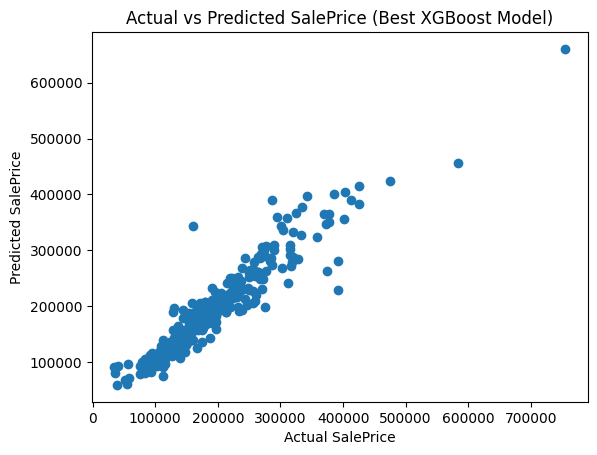

In [ ]:
predictions_best_xgb = best_xgb_model.predict(X_test)

mae_best_xgb = mean_absolute_error(y_test, predictions_best_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, predictions_best_xgb))

print(f"\nBest XGBoost Regressor MAE: {mae_best_xgb}")
print(f"Best XGBoost Regressor RMSE: {rmse_best_xgb}")

plt.scatter(y_test, predictions_best_xgb)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Best XGBoost Model)")
plt.show()

In [ ]:
from google.colab import files
submissionUpload = files.upload()

submission = pd.read_csv('test.csv')

Saving test.csv to test (5).csv


In [ ]:
predictions_toSubmit = best_xgb_model.predict(testHouse_scaled)

In [ ]:
submission_predictHouse = pd.DataFrame({
    'Id': submission['Id'],
    'SalePrice': predictions_toSubmit
})

submission_predictHouse.head()

,Id,SalePrice
0,1461,125587.742188
1,1462,165866.765625
2,1463,168544.843750
3,1464,186141.546875
4,1465,202724.437500


In [ ]:
submission_predictHouse.to_csv('submission_predictHouse.csv', index=False)